In [181]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, GRU


In [182]:
#2. Read data
import yfinance as yf

data = yf.download(tickers = "GLD", start="2017-12-01", end="2023-06-11", interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,120.940002,122.430000,120.739998,121.589996,121.589996,13080100
2017-12-04,121.150002,121.199997,120.839996,121.180000,121.180000,6943700
2017-12-05,120.099998,120.510002,119.720001,120.320000,120.320000,10041200
2017-12-06,120.040001,120.440002,119.870003,120.070000,120.070000,6643000
2017-12-07,119.010002,119.239998,118.099998,118.489998,118.489998,12900200
...,...,...,...,...,...,...
2023-06-05,180.789993,182.440002,180.600006,182.139999,182.139999,5748800
2023-06-06,182.360001,182.649994,181.520004,182.339996,182.339996,4967200
2023-06-07,181.940002,183.000000,180.149994,180.149994,180.149994,9066500


In [183]:
data = data.reset_index('Date', inplace=False)

In [184]:
df=data

# Descriptive Statistical

In [185]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1.389000e+03
mean,152.791692,153.433427,152.105112,152.789726,152.789726,8.906169e+06
std,23.203891,23.375083,22.983299,23.204068,23.204068,4.898541e+06
min,111.459999,111.879997,111.059998,111.099998,111.099998,1.436500e+06
25%,126.480003,126.769997,126.010002,126.449997,126.449997,5.748800e+06
50%,161.559998,162.440002,160.869995,161.720001,161.720001,7.692000e+06
75%,171.389999,172.169998,170.470001,171.210007,171.210007,1.058220e+07
max,193.740005,194.449997,192.520004,193.889999,193.889999,4.734770e+07


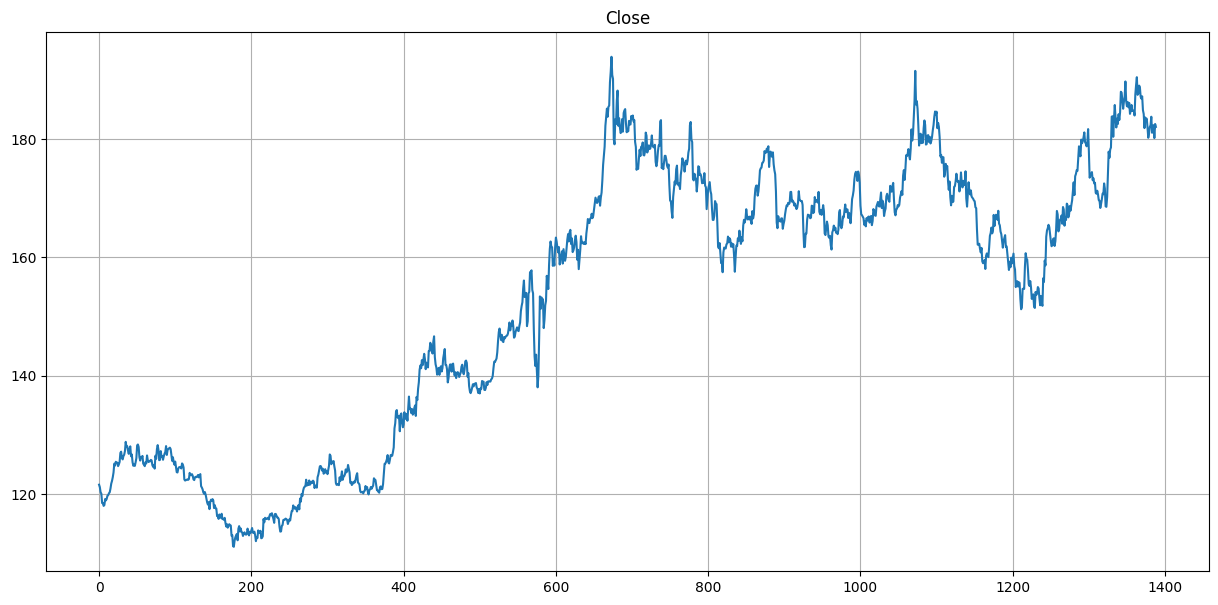

In [186]:
plt.figure(figsize=(15, 7))
plt.plot(data['Close'])
plt.title('Close')
plt.grid(True)
plt.show()

# 7:2:1

## Linear Regression

In [187]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [188]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [189]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [190]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [191]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[210.77482656 210.84771565 210.92060474 210.99349382 211.06638291
 211.13927199 211.21216108]


In [192]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[210.77482656 210.84771565 210.92060474 210.99349382 211.06638291
 211.13927199 211.21216108 211.28505017 211.35793925 211.43082834
 211.50371743 211.57660651 211.6494956  211.72238469 211.79527377
 211.86816286 211.94105195 212.01394103 212.08683012 212.15971921
 212.23260829 212.30549738 212.37838647 212.45127555 212.52416464
 212.59705372 212.66994281 212.7428319  212.81572098 212.88861007]


In [193]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 25.532339544412732
Validation RMSE: 29.27427104462186
Testing MAE: 22.258273657006903
Validation MAE: 28.711431958962166
Testing MAPE: 0.13611257968213147
Validation MAPE: 0.1640154995484438


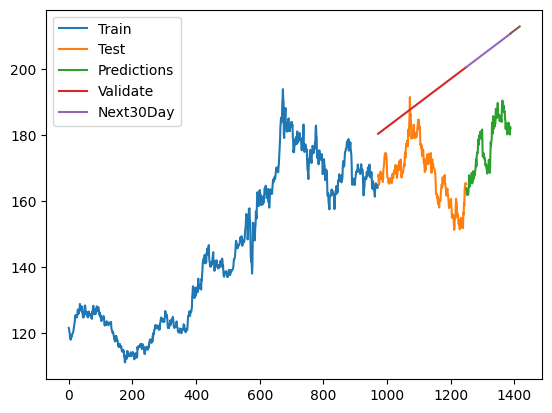

In [194]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

## Gated Recurrent Unit (GRU)

In [195]:
df = data

In [196]:
df1=df.reset_index()['Close']

In [197]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [198]:
#Split train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [199]:
#Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [200]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [201]:
#Reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [202]:
#Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [203]:
#Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 101ms/step - loss: 0.1119 - val_loss: 0.0023
Epoch 2/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0190 - val_loss: 0.0042
Epoch 3/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 4/100
14/14 [==============================] - 1s 66ms/step - loss: 0.0034 - val_loss: 9.7481e-04
Epoch 5/100
14/14 [==============================] - 1s 62ms/step - loss: 0.0013 - val_loss: 8.9583e-04
Epoch 6/100
14/14 [==============================] - 1s 64ms/step - loss: 7.3567e-04 - val_loss: 9.6937e-04
Epoch 7/100
14/14 [==============================] - 1s 66ms/step - loss: 7.3625e-04 - val_loss: 0.0010
Epoch 8/100
14/14 [==============================] - 1s 67ms/step - loss: 7.0197e-04 - val_loss: 8.8073e-04
Epoch 9/100
14/14 [==============================] - 1s 83ms/step - loss: 6.7910e-04 - val_loss: 8.3835e-04
Epoch 10/100
14/14 [==============================] - 1s 86ms/s

In [204]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 8ms/step


In [205]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [206]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [207]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 1.7378159352370233
Validation RMSE: 1.4686067519706925
Testing MAE: 1.3404004357077854
Validation MAE: 1.2063688620542876
Testing MAPE: 0.008041566318103148
Validation MAPE: 0.006522029303589476


In [208]:
#Predict 7 days after
x_input=val_data[41:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output1=[]
n_steps=100
i=0

while i < 7:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output1.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i += 1

[0.29998082]
1 day input [0.83089745 0.82365013 0.82775704 0.83560816 0.84563355 0.8258244
 0.82280471 0.8172484  0.8250997  0.85239762 0.80686067 0.75323116
 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321 0.74139385
 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736 0.70733186
 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838 0.71941061
 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543  0.75818331
 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308 0.87860849
 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966 0.87377706
 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452 0.92680278
 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162 0.909047
 0.89902161 0.90771833 0.89696825 0.90578569 0.88356083 0.8903249
 0.90167896 0.88947948 0.8896002  0.89020418 0.88017879 0.9230584
 0.94226357 0.95832834 0.9223337  0.92511177 0.94117653 0.93791522
 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192  0.85445099
 0.87619278 0.870999   0.87365616 0.855779

In [209]:
scaler.inverse_transform(lst_output1)

array([[135.93541077],
       [151.86194017],
       [150.75655713],
       [150.96274239],
       [151.32236376],
       [151.61729657],
       [151.88720567]])

In [210]:
#Predict 30 days after
x_input=val_data[41:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

[0.29998082]
1 day input [0.83089745 0.82365013 0.82775704 0.83560816 0.84563355 0.8258244
 0.82280471 0.8172484  0.8250997  0.85239762 0.80686067 0.75323116
 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321 0.74139385
 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736 0.70733186
 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838 0.71941061
 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543  0.75818331
 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308 0.87860849
 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966 0.87377706
 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452 0.92680278
 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162 0.909047
 0.89902161 0.90771833 0.89696825 0.90578569 0.88356083 0.8903249
 0.90167896 0.88947948 0.8896002  0.89020418 0.88017879 0.9230584
 0.94226357 0.95832834 0.9223337  0.92511177 0.94117653 0.93791522
 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192  0.85445099
 0.87619278 0.870999   0.87365616 0.855779

In [211]:
scaler.inverse_transform(lst_output)

array([[135.93541077],
       [151.86194017],
       [150.75655713],
       [150.96274239],
       [151.32236376],
       [151.61729657],
       [151.88720567],
       [152.14163225],
       [152.38392694],
       [152.61703822],
       [152.84319408],
       [153.06412907],
       [153.28084491],
       [153.4940522 ],
       [153.70442205],
       [153.91243807],
       [154.11848516],
       [154.32282979],
       [154.52571869],
       [154.72732457],
       [154.92783496],
       [155.12728933],
       [155.32580611],
       [155.52345933],
       [155.72030326],
       [155.91634284],
       [156.11162248],
       [156.30609777],
       [156.49979338],
       [156.69269945]])

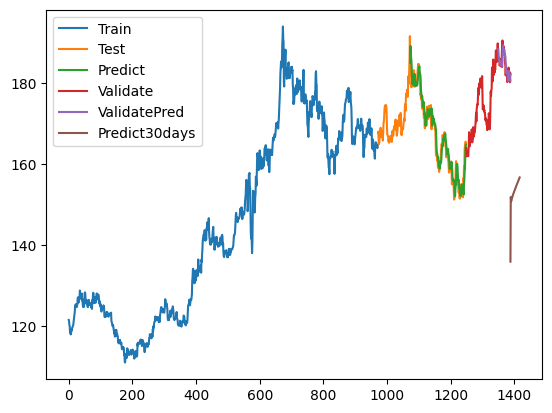

In [212]:
#Plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [213]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

#Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [214]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
#Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3388.916, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3401.218, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3400.110, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3400.075, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3400.204, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3398.235, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3397.275, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3390.910, Time=1.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3390.910, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3402.072, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3397.660, Time=1.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3395.796, Time=2.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3392.797, Time=1.81 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3388.268, Time=1.10 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [216]:
#Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [217]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(n_periods=len(x_next_7_days))

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[164.73944209 164.83447433 164.9159646  164.96414771 164.9722429
 164.94579922 164.89877997]


In [218]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[164.73944209 164.83447433 164.9159646  164.96414771 164.9722429
 164.94579922 164.89877997 164.84809441 164.80838034 164.78842253
 164.78987391 164.80818426 164.83505335 164.86143876 164.88018435
 164.88762081 164.88389777 164.87220211 164.85729341 164.84389117
 164.83538581 164.8331648  164.83661983 164.84370092 164.85175929
 164.85839123 164.86205107 164.86230952 164.85975512 164.85563518]


In [219]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 9.012185976493681
Validation RMSE: 14.445749965495896
Testing MAE: 7.3198360661438
Validation MAE: 12.3273223079167
Testing MAPE: 0.04294123397054746
Validation MAPE: 0.06790546675880851


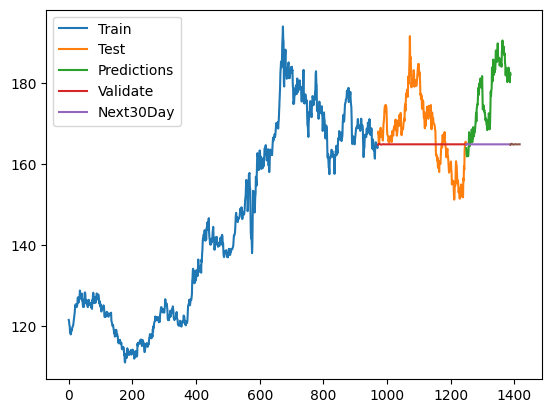

In [220]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

##Long short term memory (LSTM)

In [221]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [222]:
df1=df.reset_index()['Close']

In [223]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [224]:
#Split train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [225]:
#Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [226]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [227]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [228]:
#Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [229]:
# Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 5s 135ms/step - loss: 0.0908 - val_loss: 0.0088
Epoch 2/100
14/14 [==============================] - 2s 178ms/step - loss: 0.0124 - val_loss: 0.0108
Epoch 3/100
14/14 [==============================] - 2s 177ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 4/100
14/14 [==============================] - 3s 197ms/step - loss: 0.0037 - val_loss: 0.0046
Epoch 5/100
14/14 [==============================] - 3s 227ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 6/100
14/14 [==============================] - 2s 173ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 7/100
14/14 [==============================] - 3s 190ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 8/100
14/14 [==============================] - 3s 193ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 9/100
14/14 [==============================] - 3s 221ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 10/100
14/14 [==============================] - 3s 216ms/step - loss: 0.0018 - val_lo

In [230]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 12ms/step


In [231]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [232]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [233]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 2.161363579946442
Validation RMSE: 1.683835330946555
Testing MAE: 1.7407432035966357
Validation MAE: 1.3081277700570935
Testing MAPE: 0.010561677849294128
Validation MAPE: 0.007059535464186273


In [234]:
val_data.shape

(140, 1)

In [235]:
#Predict the next 7 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.854512]
101
1 day input [0.83089745 0.82365013 0.82775704 0.83560816 0.84563355 0.8258244
 0.82280471 0.8172484  0.8250997  0.85239762 0.80686067 0.75323116
 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321 0.74139385
 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736 0.70733186
 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838 0.71941061
 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543  0.75818331
 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308 0.87860849
 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966 0.87377706
 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452 0.92680278
 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162 0.909047
 0.89902161 0.90771833 0.89696825 0.90578569 0.88356083 0.8903249
 0.90167896 0.88947948 0.8896002  0.89020418 0.88017879 0.9230584
 0.94226357 0.95832834 0.9223337  0.92511177 0.94117653 0.93791522
 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192  0.85445099
 0.87619278 0.870999   0.87365616 0.8557

In [236]:
#Predict the next 30 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.854512]
101
1 day input [0.83089745 0.82365013 0.82775704 0.83560816 0.84563355 0.8258244
 0.82280471 0.8172484  0.8250997  0.85239762 0.80686067 0.75323116
 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321 0.74139385
 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736 0.70733186
 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838 0.71941061
 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543  0.75818331
 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308 0.87860849
 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966 0.87377706
 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452 0.92680278
 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162 0.909047
 0.89902161 0.90771833 0.89696825 0.90578569 0.88356083 0.8903249
 0.90167896 0.88947948 0.8896002  0.89020418 0.88017879 0.9230584
 0.94226357 0.95832834 0.9223337  0.92511177 0.94117653 0.93791522
 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192  0.85445099
 0.87619278 0.870999   0.87365616 0.8557

In [237]:
scaler.inverse_transform(lst_output)

array([[181.84504577],
       [181.98196802],
       [181.58666159],
       [181.47783734],
       [181.3185265 ],
       [181.23393148],
       [181.3009196 ],
       [181.15711349],
       [181.04389245],
       [180.90446339],
       [180.80053927],
       [180.65216859],
       [180.56615732],
       [180.42178865],
       [180.35325598],
       [180.19402409],
       [180.09372202],
       [179.94307645],
       [179.84307539],
       [179.68306876],
       [179.56761726],
       [179.37840726],
       [179.23487255],
       [179.06966972],
       [178.95490907],
       [178.80324696],
       [178.74602948],
       [178.61043466],
       [178.4980081 ],
       [178.25925897]])

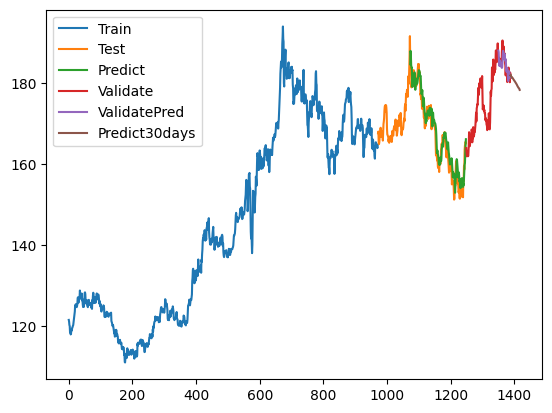

In [238]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Exponential Smoothing (ETS)

In [239]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [240]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [241]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [243]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [244]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [245]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [246]:
y_pred = simple_exp.predict(test_data.index)

In [247]:
y_pred_val= simple_exp.predict(val_data.index)

In [248]:
#8. Predict next 7 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+7))
y_next_7_days = simple_exp.predict(fh)
y_next_7_days

array([[164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365]])

In [249]:
#9. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)
y_next_30_days

array([[164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365],
       [164.66000365]])

In [250]:
# 10. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 9.085219554828248
Validation RMSE: 14.606276937354894
Testing MAE: 7.397760278702748
Validation MAE: 12.492282332140773
Testing MAPE: 0.04336394326636005
Validation MAPE: 0.0688267762522065


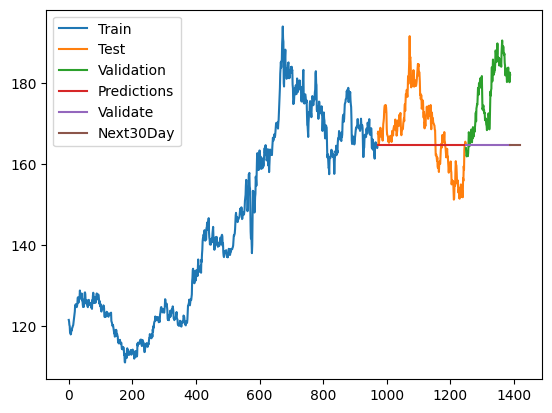

In [251]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Random Forest

In [252]:
from sklearn.ensemble import RandomForestRegressor

In [253]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [254]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [255]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [256]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [257]:
y_pred = model.predict(x_test)

In [258]:
y_pred_val =  model.predict(x_val)

In [259]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[166.92034545 166.92034545 166.92034545 166.92034545 166.92034545
 166.92034545 166.92034545 166.92034545 166.92034545 166.92034545
 166.92034545 166.92034545 166.92034545 166.92034545 166.92034545
 166.92034545 166.92034545 166.92034545 166.92034545 166.92034545
 166.92034545 166.92034545 166.92034545 166.92034545 166.92034545
 166.92034545 166.92034545 166.92034545 166.92034545 166.92034545]


In [260]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 8.462266105677235
Validation RMSE: 12.767442820602495
Testing MAE: 6.6939437417951995
Validation MAE: 10.65017188528035
Testing MAPE: 0.03967855613566787
Validation MAPE: 0.05858085246666466


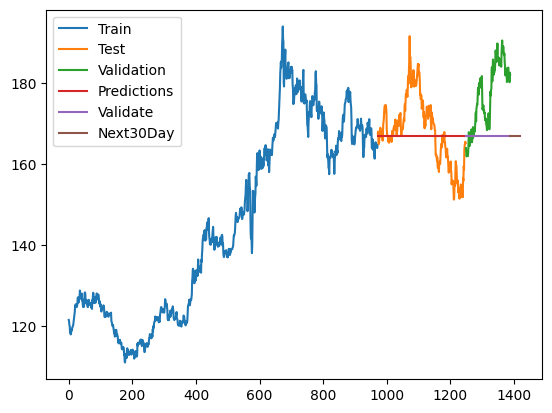

In [261]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Bayesian Neural Networks (BNN)

In [262]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [263]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values
train_close_prices = train_data['Close'].values
val_close_prices = val_data['Close'].values
test_close_prices = test_data['Close'].values

In [264]:
import torch
import torch.nn as nn

In [265]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [266]:
# Determining the architecture of a Bayesian Neural Network.
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [267]:
# Determining the loss function and optimization algorithm.
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [268]:
# Built model BNN
model = BNN(input_size=1, output_size=1)

In [269]:
# Train model BNN
for epoch in range(num_epochs):
    model.train()

    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)

    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)

    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 4582.90625
Epoch [200/1000], Loss: 4992.544921875
Epoch [300/1000], Loss: 4314.12451171875
Epoch [400/1000], Loss: 3075.217529296875
Epoch [500/1000], Loss: 4164.94482421875
Epoch [600/1000], Loss: 3094.180908203125
Epoch [700/1000], Loss: 3958.3076171875
Epoch [800/1000], Loss: 3055.57275390625
Epoch [900/1000], Loss: 2684.0849609375
Epoch [1000/1000], Loss: 3080.1591796875


In [270]:
# Test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [271]:
# Validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [272]:
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])

In [273]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = torch.sqrt(torch.mean((y_pred_test - y_test)**2))
valid_rmse = torch.sqrt(torch.mean((y_pred_val - y_val)**2))
#test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse.item())

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred_test)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 125.14537680786566
Validation RMSE: 169.19233137628635
Testing MAE: 123.1182969296452
Validation MAE: 168.67852630615235
Testing MAPE: 0.7397970686656521
Validation MAPE: 0.955112650839205


In [274]:
# Predict the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

x_next_7_days = torch.from_numpy(np.array(range(last_index+1, last_index+8)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_7_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_7_days)):
    print(f'{y_pred_next[i]}')

363.9557800292969
364.21612548828125
364.4764404296875
364.73675537109375
364.9970703125
365.25738525390625
365.5177307128906


In [275]:
# Predict the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'{y_pred_next[i]}')

363.9557800292969
364.21612548828125
364.4764404296875
364.73675537109375
364.9970703125
365.25738525390625
365.5177307128906
365.77801513671875
366.03839111328125
366.2986755371094
366.5589904785156
366.8193359375
367.07958984375
367.3399658203125
367.60028076171875
367.860595703125
368.12091064453125
368.3812255859375
368.64154052734375
368.90185546875
369.1622314453125
369.4224853515625
369.682861328125
369.94317626953125
370.2034912109375
370.46380615234375
370.72412109375
370.98443603515625
371.2447509765625
371.50506591796875


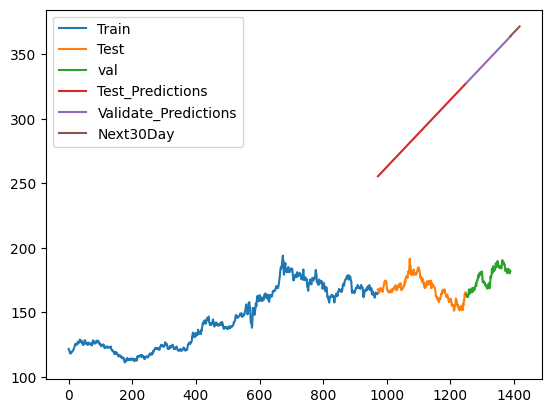

In [276]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()

## Gaussian Process Regression (GPR)

In [277]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [278]:
# Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [279]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [280]:
# Choose best kernel
kernels = [RBF(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]
param_grid = {'kernel': kernels}

gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid, cv=KFold(n_splits=5))

grid_search.fit(x_train, y_train)


print("Best Kernel:", grid_search.best_estimator_.kernel)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussi

Best Kernel: RationalQuadratic(alpha=1, length_scale=1)
Best Score: -3.9454801601839167


In [281]:
# Built model GPR
kernel = RationalQuadratic(alpha=1, length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [282]:
gpr.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         random_state=42)

In [283]:
y_pred = gpr.predict(x_test)

In [284]:
y_pred_val =  gpr.predict(x_val)

In [285]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 21.288494308941317
Validation RMSE: 38.81509494099187
Testing MAE: 19.757478791998494
Validation MAE: 37.775847450523734
Testing MAPE: 0.11595310360792702
Validation MAPE: 0.2116628095999697


In [286]:
# Predict the next 7 days
last_index =  data.index[-1]
# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = gpr.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[137.25205269 137.22795971 137.20391737 137.17992547 137.15598382
 137.13209221 137.10825044]


In [287]:
# Predict the next 30 days
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gpr.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[137.25205269 137.22795971 137.20391737 137.17992547 137.15598382
 137.13209221 137.10825044 137.08445833 137.06071567 137.03702227
 137.01337793 136.98978246 136.96623567 136.94273738 136.91928738
 136.8958855  136.87253155 136.84922533 136.82596667 136.80275538
 136.77959129 136.75647419 136.73340393 136.71038031 136.68740316
 136.66447231 136.64158756 136.61874876 136.59595572 136.57320827]


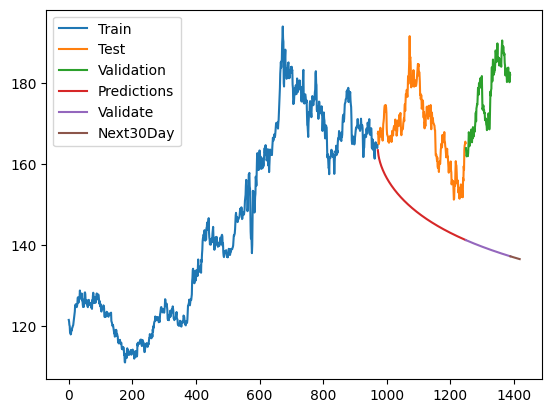

In [288]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Recurrent Neural Network (RNN)

In [289]:
df1=df.reset_index()['Close']

In [290]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [291]:
# Split train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [292]:
# Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [293]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [294]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [295]:
from keras.layers import Dense, SimpleRNN

In [296]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [297]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 43ms/step - loss: 0.0158 - val_loss: 0.0020
Epoch 2/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 3/100
14/14 [==============================] - 1s 39ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/100
14/14 [==============================] - 0s 35ms/step - loss: 9.0642e-04 - val_loss: 0.0011
Epoch 5/100
14/14 [==============================] - 1s 45ms/step - loss: 8.7517e-04 - val_loss: 0.0010
Epoch 6/100
14/14 [==============================] - 1s 36ms/step - loss: 8.2508e-04 - val_loss: 9.7153e-04
Epoch 7/100
14/14 [==============================] - 1s 39ms/step - loss: 7.9679e-04 - val_loss: 0.0011
Epoch 8/100
14/14 [==============================] - 0s 28ms/step - loss: 7.6324e-04 - val_loss: 9.1743e-04
Epoch 9/100
14/14 [==============================] - 0s 27ms/step - loss: 7.2571e-04 - val_loss: 8.8380e-04
Epoch 10/100
14/14 [==============================] - 0s 29ms/st

In [298]:
# Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 9ms/step


In [299]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [300]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [301]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 1.7617549450233003
Validation RMSE: 1.455467180248895
Testing MAE: 1.363090515136719
Validation MAE: 1.1884515224358982
Testing MAPE: 0.00820444689640023
Validation MAPE: 0.00642528292395866


In [302]:
# Predict the next 7 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.852778]
101
1 day input [0.83089745 0.82365013 0.82775704 0.83560816 0.84563355 0.8258244
 0.82280471 0.8172484  0.8250997  0.85239762 0.80686067 0.75323116
 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321 0.74139385
 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736 0.70733186
 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838 0.71941061
 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543  0.75818331
 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308 0.87860849
 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966 0.87377706
 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452 0.92680278
 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162 0.909047
 0.89902161 0.90771833 0.89696825 0.90578569 0.88356083 0.8903249
 0.90167896 0.88947948 0.8896002  0.89020418 0.88017879 0.9230584
 0.94226357 0.95832834 0.9223337  0.92511177 0.94117653 0.93791522
 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192  0.85445099
 0.87619278 0.870999   0.87365616 0.8557

In [303]:
scaler.inverse_transform(lst_output)

array([[181.70149133],
       [181.97608096],
       [181.64527065],
       [181.5917739 ],
       [181.85568985],
       [181.79202769],
       [181.84275115]])

In [304]:
# Predict the next 30 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.852778]
101
1 day input [0.83089745 0.82365013 0.82775704 0.83560816 0.84563355 0.8258244
 0.82280471 0.8172484  0.8250997  0.85239762 0.80686067 0.75323116
 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321 0.74139385
 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736 0.70733186
 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838 0.71941061
 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543  0.75818331
 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308 0.87860849
 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966 0.87377706
 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452 0.92680278
 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162 0.909047
 0.89902161 0.90771833 0.89696825 0.90578569 0.88356083 0.8903249
 0.90167896 0.88947948 0.8896002  0.89020418 0.88017879 0.9230584
 0.94226357 0.95832834 0.9223337  0.92511177 0.94117653 0.93791522
 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192  0.85445099
 0.87619278 0.870999   0.87365616 0.8557

In [305]:
scaler.inverse_transform(lst_output)

array([[181.70149133],
       [181.97608096],
       [181.64527065],
       [181.5917739 ],
       [181.85568985],
       [181.79202769],
       [181.84275115],
       [181.73832863],
       [181.60462872],
       [181.81393762],
       [181.49749706],
       [181.40715808],
       [181.37945485],
       [181.28335712],
       [181.43067178],
       [180.81491396],
       [180.8475864 ],
       [180.70169786],
       [180.6159876 ],
       [180.37390263],
       [180.42925974],
       [180.21984721],
       [180.26556691],
       [180.25583575],
       [180.11760088],
       [180.14211631],
       [180.08915251],
       [180.2364573 ],
       [180.09622389],
       [180.02126134]])

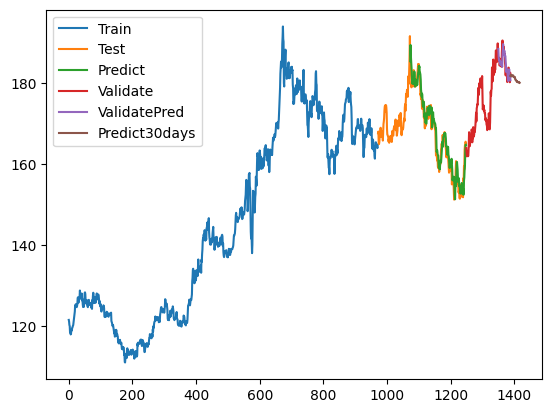

In [306]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# 6:2:2

## Linear Regression

In [307]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [308]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [309]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [310]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [311]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[222.06815717 222.1514333  222.23470943 222.31798556 222.4012617
 222.48453783 222.56781396]


In [312]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[222.06815717 222.1514333  222.23470943 222.31798556 222.4012617
 222.48453783 222.56781396 222.6510901  222.73436623 222.81764236
 222.90091849 222.98419463 223.06747076 223.15074689 223.23402302
 223.31729916 223.40057529 223.48385142 223.56712755 223.65040369
 223.73367982 223.81695595 223.90023209 223.98350822 224.06678435
 224.15006048 224.23333662 224.31661275 224.39988888 224.48316501]


In [313]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 17.60815610467803
Validation RMSE: 41.148160909806855
Testing MAE: 16.532416167539854
Validation MAE: 40.348495317810354
Testing MAPE: 0.09744087110084457
Validation MAPE: 0.2402897565536134


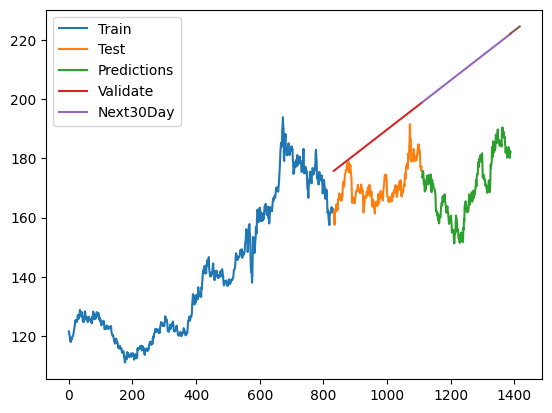

In [314]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

## Gated Recurrent Unit (GRU)

In [315]:
df = data

In [316]:
df1=df.reset_index()['Close']

In [317]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [318]:
#Split train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [319]:
#Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [320]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [321]:
#Reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [322]:
#Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [323]:
#Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 68ms/step - loss: 0.1276 - val_loss: 0.0445
Epoch 2/100
12/12 [==============================] - 0s 39ms/step - loss: 0.0228 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 0s 38ms/step - loss: 0.0110 - val_loss: 0.0163
Epoch 4/100
12/12 [==============================] - 0s 39ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 0s 39ms/step - loss: 0.0022 - val_loss: 7.4023e-04
Epoch 6/100
12/12 [==============================] - 0s 39ms/step - loss: 9.5850e-04 - val_loss: 8.6947e-04
Epoch 7/100
12/12 [==============================] - 0s 41ms/step - loss: 8.0643e-04 - val_loss: 8.1634e-04
Epoch 8/100
12/12 [==============================] - 0s 39ms/step - loss: 7.8208e-04 - val_loss: 7.2619e-04
Epoch 9/100
12/12 [==============================] - 0s 40ms/step - loss: 7.4133e-04 - val_loss: 7.0185e-04
Epoch 10/100
12/12 [==============================] - 0s 39ms/st

In [324]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 7ms/step


In [325]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [326]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [327]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 1.6422393489096674
Validation RMSE: 1.8341157887602413
Testing MAE: 1.2381537177345978
Validation MAE: 1.4306189719210847
Testing MAPE: 0.007180405010716865
Validation MAPE: 0.008365487599100139


In [328]:
#Predict 7 days after
x_input=val_data[179:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output1=[]
n_steps=100
i=0

while i < 7:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output1.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i += 1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [329]:
scaler.inverse_transform(lst_output1)

array([[182.28916594],
       [182.4374626 ],
       [182.57769602],
       [182.70879536],
       [182.83309966],
       [182.95148236],
       [183.06480702]])

In [330]:
#Predict 30 days after
x_input=val_data[179:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [331]:
scaler.inverse_transform(lst_output)

array([[182.28916594],
       [182.4374626 ],
       [182.57769602],
       [182.70879536],
       [182.83309966],
       [182.95148236],
       [183.06480702],
       [183.17357699],
       [183.27833507],
       [183.37943656],
       [183.47735519],
       [183.5726387 ],
       [183.66535126],
       [183.75552739],
       [183.84343358],
       [183.92921292],
       [184.01305294],
       [184.09501778],
       [184.17526537],
       [184.25384996],
       [184.33094923],
       [184.40647433],
       [184.48053383],
       [184.55325111],
       [184.6246607 ],
       [184.69477247],
       [184.76365551],
       [184.83119632],
       [184.89747879],
       [184.96253746]])

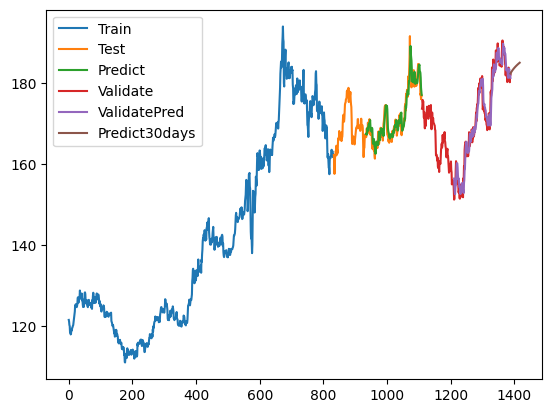

In [332]:
#Plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [333]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

#Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [334]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [335]:
#Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2903.045, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2916.090, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2916.068, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2916.129, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2915.090, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2919.656, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2919.180, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2904.456, Time=1.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2904.485, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2918.030, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2911.386, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2908.623, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2906.177, Time=2.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2902.492, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [336]:
#Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [337]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(n_periods=len(x_next_7_days))

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[161.8918602  162.02667671 162.14406629 162.2165245  162.2340688
 162.20329464 162.14223671]


In [338]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[161.8918602  162.02667671 162.14406629 162.2165245  162.2340688
 162.20329464 162.14223671 162.07325424 162.01622771 161.98380415
 161.97953013 161.99877559 162.03163286 162.06661923 162.09403858
 162.10818218 162.10802356 162.09653192 162.07906842 162.06147763
 162.04844162 162.04247859 162.04371925 162.05036085 162.05954006
 162.06830791 162.07442789 162.07682206 162.07561929 162.0718741 ]


In [339]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 10.56736765669502
Validation RMSE: 12.920758230274417
Testing MAE: 8.736207379259207
Validation MAE: 10.442733797381921
Testing MAPE: 0.050038562707713924
Validation MAPE: 0.05940897200869312


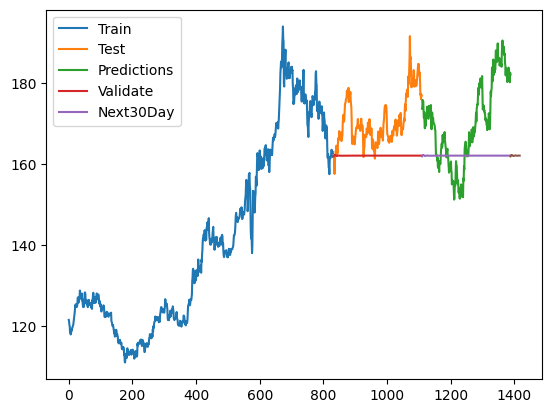

In [340]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

##Long short term memory (LSTM)

In [341]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [342]:
df1=df.reset_index()['Close']

In [343]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [344]:
#Split train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [345]:
#Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [346]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [347]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [348]:
#Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [349]:
# Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 119ms/step - loss: 0.1408 - val_loss: 0.0041
Epoch 2/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0222 - val_loss: 0.0371
Epoch 3/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0139 - val_loss: 0.0063
Epoch 4/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0084 - val_loss: 0.0034
Epoch 5/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0060 - val_loss: 0.0028
Epoch 6/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 2s 156ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 8/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 9/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 10/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0022 - val_los

In [350]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 12ms/step


In [351]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [352]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [353]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 2.151159843587761
Validation RMSE: 2.3017676479886813
Testing MAE: 1.678347154097124
Validation MAE: 1.7867161611492717
Testing MAPE: 0.00979795894501667
Validation MAPE: 0.010554927761233837


In [354]:
val_data.shape

(279, 1)

In [355]:
#Predict the next 7 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [356]:
scaler.inverse_transform(lst_output)

array([[181.70616939],
       [181.52058637],
       [180.84165987],
       [180.88260775],
       [180.1253187 ],
       [180.00375314],
       [179.58931006]])

In [357]:
#Predict the next 30 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [358]:
scaler.inverse_transform(lst_output)

array([[181.70616939],
       [181.52058637],
       [180.84165987],
       [180.88260775],
       [180.1253187 ],
       [180.00375314],
       [179.58931006],
       [179.36700324],
       [179.1048391 ],
       [178.85322529],
       [178.62655128],
       [178.38142162],
       [178.14946752],
       [177.94387936],
       [177.67586764],
       [177.49021554],
       [177.21074552],
       [177.01190798],
       [176.72170999],
       [176.50047893],
       [176.22285941],
       [175.99525769],
       [175.73675507],
       [175.48217059],
       [175.22749727],
       [174.9539834 ],
       [174.69305786],
       [174.40222823],
       [174.18382473],
       [173.958641  ]])

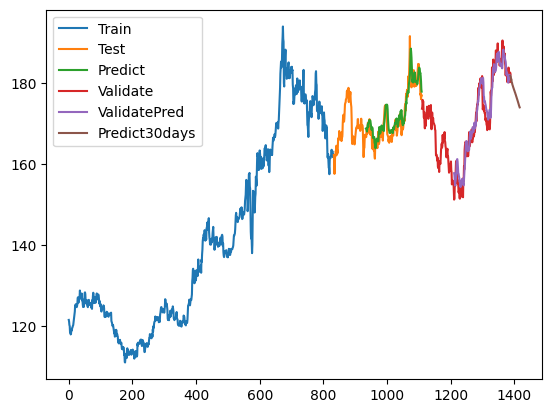

In [359]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Exponential Smoothing (ETS)

In [360]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [361]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [362]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [363]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [364]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [365]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [366]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [367]:
y_pred = simple_exp.predict(test_data.index)

In [368]:
y_pred_val= simple_exp.predict(val_data.index)

In [369]:
#8. Predict next 7 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+7))
y_next_7_days = simple_exp.predict(fh)
y_next_7_days

array([[161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879]])

In [370]:
#9. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)
y_next_30_days

array([[161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879],
       [161.77999879]])

In [371]:
# 10. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 10.802111373913673
Validation RMSE: 13.100167216983388
Testing MAE: 9.004296855310676
Validation MAE: 10.5898932405791
Testing MAPE: 0.05160466953255592
Validation MAPE: 0.060212004135539614


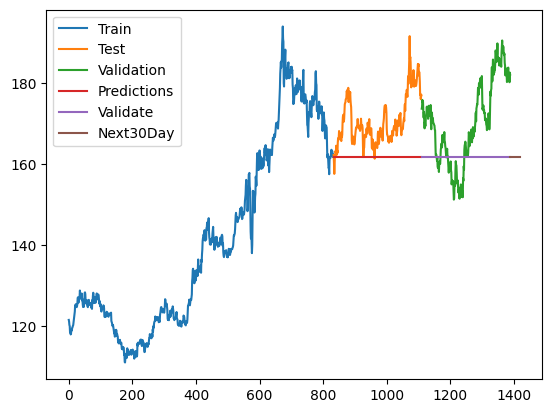

In [372]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Random Forest

In [373]:
from sklearn.ensemble import RandomForestRegressor

In [374]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [375]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [376]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [377]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [378]:
y_pred = model.predict(x_test)

In [379]:
y_pred_val =  model.predict(x_val)

In [380]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[162.3879573 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573
 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573
 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573
 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573
 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573 162.3879573]


In [381]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 10.304234201993115
Validation RMSE: 12.724581737715361
Testing MAE: 8.433288067949125
Validation MAE: 10.28609931279464
Testing MAPE: 0.04826895839450806
Validation MAPE: 0.058560329784153285


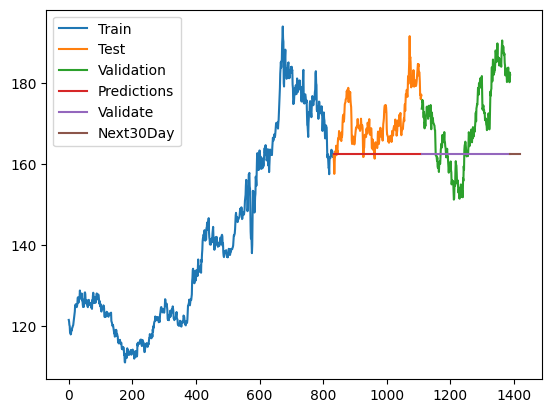

In [382]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Bayesian Neural Networks (BNN)

In [383]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [384]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values
train_close_prices = train_data['Close'].values
val_close_prices = val_data['Close'].values
test_close_prices = test_data['Close'].values

In [385]:
import torch
import torch.nn as nn

In [386]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [387]:
# Determining the architecture of a Bayesian Neural Network.
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [388]:
# Determining the loss function and optimization algorithm.
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [389]:
# Built model BNN
model = BNN(input_size=1, output_size=1)

In [390]:
# Train model BNN
for epoch in range(num_epochs):
    model.train()

    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)

    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)

    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 9763.712890625
Epoch [200/1000], Loss: 5053.85009765625
Epoch [300/1000], Loss: 9016.474609375
Epoch [400/1000], Loss: 6736.0029296875
Epoch [500/1000], Loss: 4208.02734375
Epoch [600/1000], Loss: 2969.38037109375
Epoch [700/1000], Loss: 3230.845703125
Epoch [800/1000], Loss: 4728.0634765625
Epoch [900/1000], Loss: 5128.3662109375
Epoch [1000/1000], Loss: 2765.992431640625


In [391]:
# Test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [392]:
# Validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [393]:
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])

In [394]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = torch.sqrt(torch.mean((y_pred_test - y_test)**2))
valid_rmse = torch.sqrt(torch.mean((y_pred_val - y_val)**2))
#test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse.item())

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred_test)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 89.82218369323338
Validation RMSE: 162.35508886057434
Testing MAE: 87.13321908888834
Validation MAE: 160.65675572767907
Testing MAPE: 0.5098916714732354
Validation MAPE: 0.9472871430284977


In [395]:
# Predict the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

x_next_7_days = torch.from_numpy(np.array(range(last_index+1, last_index+8)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_7_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_7_days)):
    print(f'{y_pred_next[i]}')

367.408935546875
367.6710205078125
367.93310546875
368.1951904296875
368.457275390625
368.7193298339844
368.98138427734375


In [396]:
# Predict the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'{y_pred_next[i]}')

367.408935546875
367.6710205078125
367.93310546875
368.1951904296875
368.457275390625
368.7193298339844
368.98138427734375
369.2434997558594
369.505615234375
369.7676696777344
370.02972412109375
370.2918395996094
370.55389404296875
370.81597900390625
371.07806396484375
371.34014892578125
371.60223388671875
371.86431884765625
372.12640380859375
372.38848876953125
372.6505126953125
372.91259765625
373.1746826171875
373.436767578125
373.6988525390625
373.9609375
374.2230224609375
374.485107421875
374.7471923828125
375.00927734375


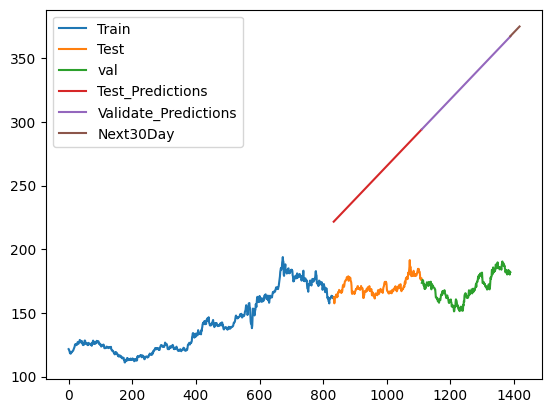

In [397]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()

## Gaussian Process Regression (GPR)

In [398]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [399]:
# Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [400]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [401]:
# Choose best kernel
kernels = [RBF(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]
param_grid = {'kernel': kernels}

gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid, cv=KFold(n_splits=5))

grid_search.fit(x_train, y_train)


print("Best Kernel:", grid_search.best_estimator_.kernel)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------------------------------------

Best Kernel: RationalQuadratic(alpha=1, length_scale=1)
Best Score: -3.341558471027407


In [402]:
# Built model GPR
kernel = RationalQuadratic(alpha=1, length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [403]:
gpr.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         random_state=42)

In [404]:
y_pred = gpr.predict(x_test)

In [405]:
y_pred_val =  gpr.predict(x_val)

In [406]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 26.790804509438853
Validation RMSE: 37.71771395809817
Testing MAE: 24.76965755037862
Validation MAE: 35.94284252768578
Testing MAPE: 0.14347589979107706
Validation MAPE: 0.20815114400627466


In [407]:
# Predict the next 7 days
last_index =  data.index[-1]
# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = gpr.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[130.86918176 130.85015651 130.83116496 130.812207   130.79328253
 130.77439142 130.75553357]


In [408]:
# Predict the next 30 days
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gpr.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[130.86918176 130.85015651 130.83116496 130.812207   130.79328253
 130.77439142 130.75553357 130.73670886 130.71791721 130.69915848
 130.68043258 130.6617394  130.64307883 130.62445077 130.60585511
 130.58729174 130.56876057 130.55026148 130.53179437 130.51335914
 130.4949557  130.47658392 130.45824372 130.439935   130.42165764
 130.40341156 130.38519665 130.36701281 130.34885994 130.33073795]


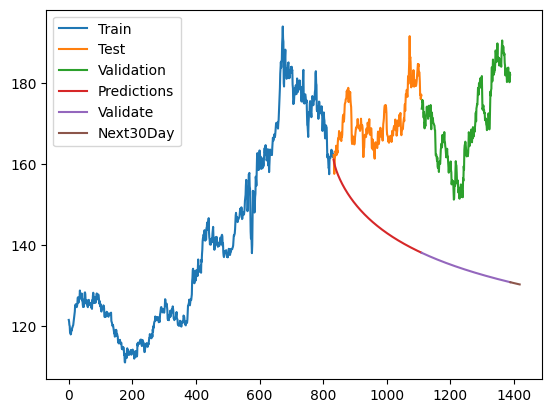

In [409]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Recurrent Neural Network (RNN)

In [410]:
df1=df.reset_index()['Close']

In [411]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [412]:
# Split train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [413]:
# Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [414]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [415]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [416]:
from keras.layers import Dense, SimpleRNN

In [417]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [418]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 88ms/step - loss: 0.0175 - val_loss: 0.0036
Epoch 2/100
12/12 [==============================] - 0s 42ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 3/100
12/12 [==============================] - 0s 42ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0012 - val_loss: 9.8421e-04
Epoch 8/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0011 - val_loss: 9.8219e-04
Epoch 9/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0010 - val_loss

In [419]:
# Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 6ms/step


In [420]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [421]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [422]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 1.6287123733516182
Validation RMSE: 1.8270697723576796
Testing MAE: 1.234787074002353
Validation MAE: 1.4288931857334095
Testing MAPE: 0.007173091662214711
Validation MAPE: 0.00834732178776213


In [423]:
# Predict the next 7 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [424]:
scaler.inverse_transform(lst_output)

array([[182.49355992],
       [182.61998613],
       [182.69463779],
       [182.64496048],
       [182.9967086 ],
       [183.26573192],
       [183.74764672]])

In [425]:
# Predict the next 30 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [426]:
scaler.inverse_transform(lst_output)

array([[182.49355992],
       [182.61998613],
       [182.69463779],
       [182.64496048],
       [182.9967086 ],
       [183.26573192],
       [183.74764672],
       [183.40808724],
       [183.54222634],
       [183.72680268],
       [183.44851205],
       [183.74001279],
       [183.69110529],
       [183.82480027],
       [183.9290254 ],
       [183.60465977],
       [183.5053545 ],
       [183.52701769],
       [183.40242718],
       [183.59278695],
       [183.78358592],
       [183.77012907],
       [183.76188324],
       [183.84063068],
       [183.86921228],
       [183.85369769],
       [183.90277297],
       [184.06986084],
       [184.05937467],
       [184.09010779]])

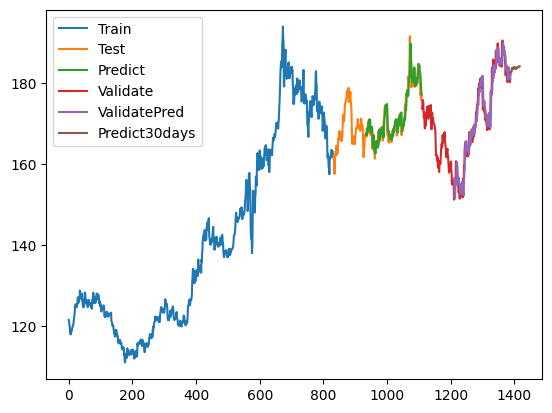

In [427]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# 8:1:1

## Linear Regression

In [428]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [429]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [430]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [431]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [432]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[203.37909147 203.44492823 203.51076499 203.57660175 203.64243851
 203.70827528 203.77411204]


In [433]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[203.37909147 203.44492823 203.51076499 203.57660175 203.64243851
 203.70827528 203.77411204 203.8399488  203.90578556 203.97162232
 204.03745908 204.10329584 204.1691326  204.23496936 204.30080612
 204.36664288 204.43247964 204.4983164  204.56415317 204.62998993
 204.69582669 204.76166345 204.82750021 204.89333697 204.95917373
 205.02501049 205.09084725 205.15668401 205.22252077 205.28835753]


In [434]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 28.073509446811336
Validation RMSE: 22.596688936646082
Testing MAE: 26.514333952344167
Validation MAE: 21.812885829994574
Testing MAPE: 0.16525092454773346
Validation MAPE: 0.12500581462567198


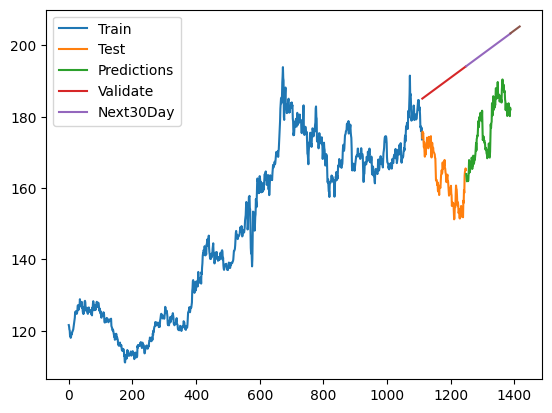

In [435]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

## Gated Recurrent Unit (GRU)

In [436]:
df = data

In [437]:
df1=df.reset_index()['Close']

In [438]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [439]:
#Split train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [440]:
#Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [441]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [442]:
#Reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [443]:
#Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [444]:
#Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 4s 94ms/step - loss: 0.1252 - val_loss: 0.0047
Epoch 2/100
16/16 [==============================] - 1s 62ms/step - loss: 0.0192 - val_loss: 0.0017
Epoch 3/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0086 - val_loss: 0.0015
Epoch 4/100
16/16 [==============================] - 1s 60ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 5/100
16/16 [==============================] - 1s 63ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 6/100
16/16 [==============================] - 1s 72ms/step - loss: 8.4478e-04 - val_loss: 0.0015
Epoch 7/100
16/16 [==============================] - 1s 85ms/step - loss: 7.2705e-04 - val_loss: 0.0014
Epoch 8/100
16/16 [==============================] - 1s 82ms/step - loss: 7.0966e-04 - val_loss: 0.0014
Epoch 9/100
16/16 [==============================] - 1s 70ms/step - loss: 6.8561e-04 - val_loss: 0.0014
Epoch 10/100
16/16 [==============================] - 1s 59ms/step - loss: 6.7266e-0

In [445]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 11ms/step


In [446]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [447]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [448]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 2.0159124678143603
Validation RMSE: 1.4616089205674283
Testing MAE: 1.5701133109427787
Validation MAE: 1.1927944085536866
Testing MAPE: 0.010044210541237839
Validation MAPE: 0.006450061175770332


In [449]:
#Predict 7 days after
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output1=[]
n_steps=100
i=0

while i < 7:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output1.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i += 1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [450]:
scaler.inverse_transform(lst_output1)

array([[181.89346474],
       [181.78466516],
       [181.66575446],
       [181.54963677],
       [181.4370523 ],
       [181.3281491 ],
       [181.22290743]])

In [451]:
#Predict 30 days after
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [452]:
scaler.inverse_transform(lst_output)

array([[181.89346474],
       [181.78466516],
       [181.66575446],
       [181.54963677],
       [181.4370523 ],
       [181.3281491 ],
       [181.22290743],
       [181.12088315],
       [181.02198253],
       [180.92598348],
       [180.83307848],
       [180.74383993],
       [180.65745856],
       [180.57331259],
       [180.49159448],
       [180.41228448],
       [180.33539248],
       [180.26064212],
       [180.18812716],
       [180.11768477],
       [180.04931493],
       [179.9826673 ],
       [179.91776654],
       [179.85471134],
       [179.7933438 ],
       [179.73346653],
       [179.67504499],
       [179.61770908],
       [179.56153775],
       [179.50655073]])

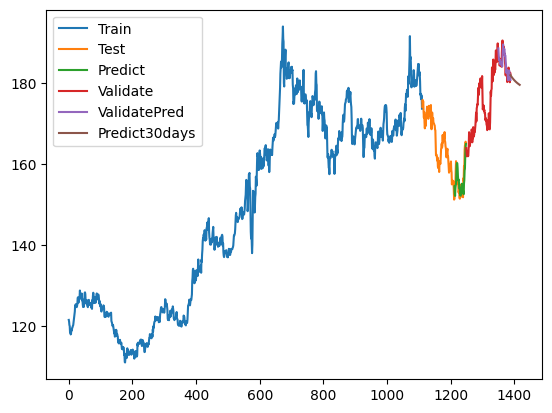

In [453]:
#Plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [454]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

#Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [455]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [456]:
#Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3917.589, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3925.711, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3924.645, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3924.524, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3924.928, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3922.203, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3921.681, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3925.559, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3919.447, Time=3.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3926.296, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3923.280, Time=2.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3922.494, Time=1.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3921.438, Time=1.78 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3917.202, Time=1.40 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [457]:
#Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [458]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(n_periods=len(x_next_7_days))

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[173.65086016 173.70253235 173.76535632 173.82119639 173.8576398
 173.86984102 173.86007158]


In [459]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[173.65086016 173.70253235 173.76535632 173.82119639 173.8576398
 173.86984102 173.86007158 173.83559143 173.80574142 173.77915413
 173.7617534  173.75586925 173.76044447 173.7720418  173.78622441
 173.79888329 173.80719142 173.81002853 173.80788642 173.80239243
 173.79565397 173.78962685 173.78566018 173.7842925  173.78529517
 173.78789774 173.79109928 173.79396885 173.79586266 173.79652184]


In [460]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 12.755066953770653
Validation RMSE: 8.528009889544252
Testing MAE: 10.823639837678044
Validation MAE: 7.482796218281081
Testing MAPE: 0.06824319712514869
Validation MAPE: 0.04186512151894734


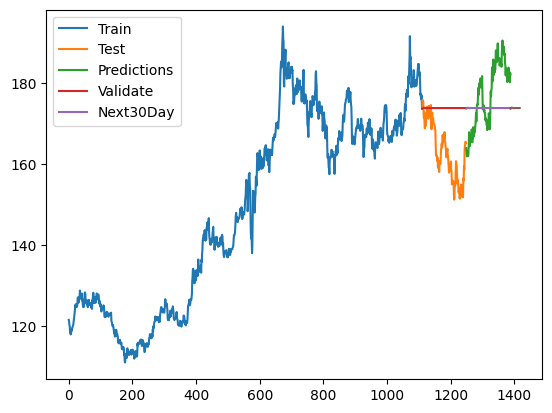

In [461]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

##Long short term memory (LSTM)

In [462]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [463]:
df1=df.reset_index()['Close']

In [464]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [465]:
#Split train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [466]:
#Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [467]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [468]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [469]:
#Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [470]:
# Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 7s 200ms/step - loss: 0.0923 - val_loss: 0.0035
Epoch 2/100
16/16 [==============================] - 3s 161ms/step - loss: 0.0116 - val_loss: 0.0149
Epoch 3/100
16/16 [==============================] - 3s 172ms/step - loss: 0.0056 - val_loss: 0.0121
Epoch 4/100
16/16 [==============================] - 3s 173ms/step - loss: 0.0041 - val_loss: 0.0085
Epoch 5/100
16/16 [==============================] - 4s 251ms/step - loss: 0.0033 - val_loss: 0.0075
Epoch 6/100
16/16 [==============================] - 3s 175ms/step - loss: 0.0026 - val_loss: 0.0071
Epoch 7/100
16/16 [==============================] - 3s 177ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 8/100
16/16 [==============================] - 2s 146ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 9/100
16/16 [==============================] - 3s 205ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 10/100
16/16 [==============================] - 3s 178ms/step - loss: 0.0016 - val_lo

In [471]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 9ms/step


In [472]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [473]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [474]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 2.0722599726584865
Validation RMSE: 1.6196141058758389
Testing MAE: 1.7520999392947636
Validation MAE: 1.3512264153896256
Testing MAPE: 0.011305138660329202
Validation MAPE: 0.007307504836530428


In [475]:
#Predict the next 7 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [476]:
scaler.inverse_transform(lst_output)

array([[182.8761349 ],
       [182.56683481],
       [182.56856688],
       [182.01641201],
       [181.80679715],
       [181.73728248],
       [181.80717712]])

In [477]:
#Predict the next 30 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [478]:
scaler.inverse_transform(lst_output)

array([[182.8761349 ],
       [182.56683481],
       [182.56856688],
       [182.01641201],
       [181.80679715],
       [181.73728248],
       [181.80717712],
       [181.74071207],
       [181.78672786],
       [181.73289556],
       [181.74828185],
       [181.6912815 ],
       [181.6485522 ],
       [181.65076293],
       [181.61579587],
       [181.64105644],
       [181.52022121],
       [181.57186252],
       [181.47306552],
       [181.41564571],
       [181.23539707],
       [181.06915302],
       [180.77258437],
       [180.60883727],
       [180.37315256],
       [180.25299338],
       [180.1700416 ],
       [180.09726511],
       [179.75304237],
       [179.39053174]])

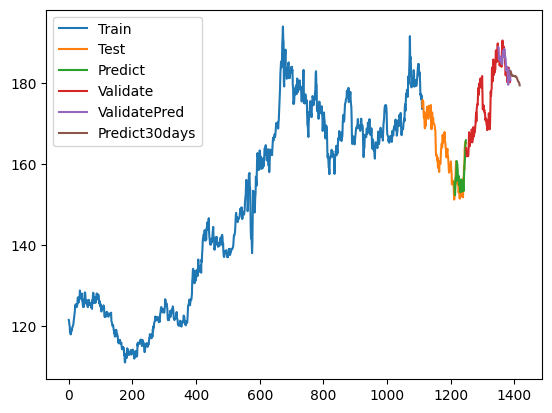

In [479]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Exponential Smoothing (ETS)

In [480]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [481]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [482]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [483]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [484]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [485]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [486]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [487]:
y_pred = simple_exp.predict(test_data.index)

In [488]:
y_pred_val= simple_exp.predict(val_data.index)

In [489]:
#8. Predict next 7 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+7))
y_next_7_days = simple_exp.predict(fh)
y_next_7_days

array([[173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494]])

In [490]:
#9. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)
y_next_30_days

array([[173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494],
       [173.63000494]])

In [491]:
# 10. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 12.618502692273207
Validation RMSE: 8.589255714423595
Testing MAE: 10.674715061550753
Validation MAE: 7.5191419209202905
Testing MAPE: 0.06732247490710368
Validation MAPE: 0.04203515490605427


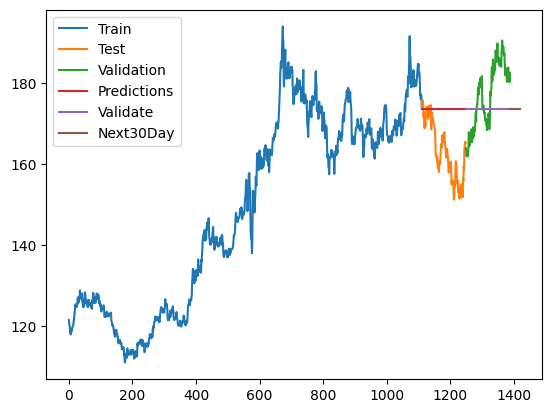

In [492]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Random Forest

In [493]:
from sklearn.ensemble import RandomForestRegressor

In [494]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [495]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [496]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [497]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [498]:
y_pred = model.predict(x_test)

In [499]:
y_pred_val =  model.predict(x_val)

In [500]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[178.2505613 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613
 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613
 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613
 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613
 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613 178.2505613]


In [501]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 16.67765781927031
Validation RMSE: 8.042268143752636
Testing MAE: 15.178605158844228
Validation MAE: 7.011563375182818
Testing MAPE: 0.09504158042905245
Validation MAPE: 0.04021379759567434


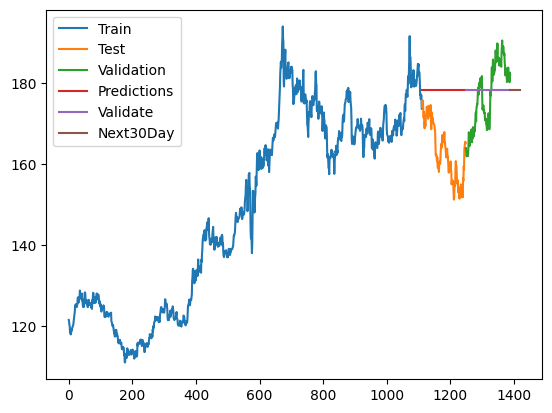

In [502]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Bayesian Neural Networks (BNN)

In [503]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [504]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values
train_close_prices = train_data['Close'].values
val_close_prices = val_data['Close'].values
test_close_prices = test_data['Close'].values

In [505]:
import torch
import torch.nn as nn

In [506]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [507]:
# Determining the architecture of a Bayesian Neural Network.
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [508]:
# Determining the loss function and optimization algorithm.
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [509]:
# Built model BNN
model = BNN(input_size=1, output_size=1)

In [510]:
# Train model BNN
for epoch in range(num_epochs):
    model.train()

    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)

    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)

    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 3995.46044921875
Epoch [200/1000], Loss: 3883.209228515625
Epoch [300/1000], Loss: 3225.419921875
Epoch [400/1000], Loss: 3238.483154296875
Epoch [500/1000], Loss: 3273.281982421875
Epoch [600/1000], Loss: 3390.896484375
Epoch [700/1000], Loss: 3467.599853515625
Epoch [800/1000], Loss: 3395.559814453125
Epoch [900/1000], Loss: 3209.7470703125
Epoch [1000/1000], Loss: 3345.89013671875


In [511]:
# Test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [512]:
# Validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [513]:
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])

In [514]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = torch.sqrt(torch.mean((y_pred_test - y_test)**2))
valid_rmse = torch.sqrt(torch.mean((y_pred_val - y_val)**2))
#test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse.item())

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred_test)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 121.88948495419785
Validation RMSE: 141.1182794264355
Testing MAE: 121.32323942322662
Validation MAE: 140.56620505196707
Testing MAPE: 0.7491814868990727
Validation MAPE: 0.7960874612850978


In [515]:
# Predict the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

x_next_7_days = torch.from_numpy(np.array(range(last_index+1, last_index+8)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_7_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_7_days)):
    print(f'{y_pred_next[i]}')

334.2768859863281
334.5149841308594
334.7530517578125
334.9912109375
335.2292785644531
335.46734619140625
335.7054748535156


In [516]:
# Predict the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'{y_pred_next[i]}')

334.2768859863281
334.5149841308594
334.7530517578125
334.9912109375
335.2292785644531
335.46734619140625
335.7054748535156
335.9435729980469
336.181640625
336.4197692871094
336.6578674316406
336.8959655761719
337.1340637207031
337.3721618652344
337.6102600097656
337.848388671875
338.0864562988281
338.3245544433594
338.5626525878906
338.8007507324219
339.0388488769531
339.2769470214844
339.5150451660156
339.7531433105469
339.9912414550781
340.2293395996094
340.4674377441406
340.70556640625
340.94366455078125
341.1817626953125


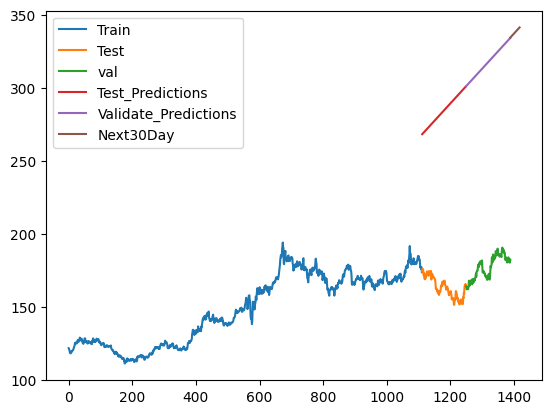

In [517]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()

## Gaussian Process Regression (GPR)

In [518]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [519]:
# Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [520]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [521]:
# Choose best kernel
kernels = [RBF(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]
param_grid = {'kernel': kernels}

gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid, cv=KFold(n_splits=5))

grid_search.fit(x_train, y_train)


print("Best Kernel:", grid_search.best_estimator_.kernel)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The op

Best Kernel: RationalQuadratic(alpha=1, length_scale=1)
Best Score: -3.1747381505061516


In [522]:
# Built model GPR
kernel = RationalQuadratic(alpha=1, length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [523]:
gpr.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         random_state=42)

In [524]:
y_pred = gpr.predict(x_test)

In [525]:
y_pred_val =  gpr.predict(x_val)

In [526]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 4.559845255036047
Validation RMSE: 28.769491331751837
Testing MAE: 3.6018891012264618
Validation MAE: 27.110415964415882
Testing MAPE: 0.021767278909516567
Validation MAPE: 0.15108430183644694


In [527]:
# Predict the next 7 days
last_index =  data.index[-1]
# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = gpr.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[146.72159643 146.68466072 146.64783734 146.61112563 146.57452489
 146.53803447 146.5016537 ]


In [528]:
# Predict the next 30 days
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gpr.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[146.72159643 146.68466072 146.64783734 146.61112563 146.57452489
 146.53803447 146.5016537  146.46538192 146.42921848 146.39316273
 146.35721405 146.32137178 146.28563532 146.25000403 146.2144773
 146.17905451 146.14373507 146.10851838 146.07340383 146.03839085
 146.00347884 145.96866723 145.93395545 145.89934293 145.8648291
 145.8304134  145.79609529 145.76187422 145.72774963 145.69372099]


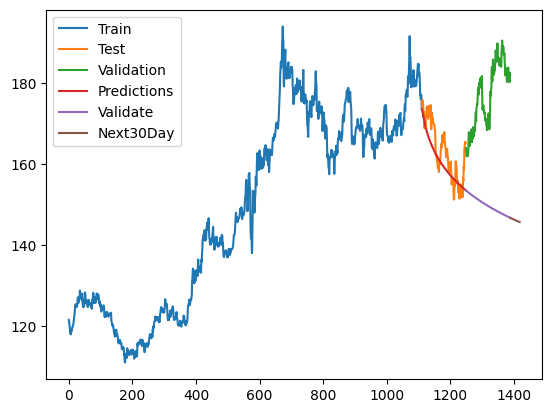

In [529]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Recurrent Neural Network (RNN)

In [530]:
df1=df.reset_index()['Close']

In [531]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [532]:
# Split train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [533]:
# Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [534]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [535]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [536]:
from keras.layers import Dense, SimpleRNN

In [537]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [538]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 2s 40ms/step - loss: 0.0256 - val_loss: 0.0028
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/100
16/16 [==============================] - 0s 25ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/100
16/16 [==============================] - 0s 25ms/step - loss: 8.1113e-04 - val_loss: 0.0013
Epoch 5/100
16/16 [==============================] - 0s 27ms/step - loss: 7.2226e-04 - val_loss: 0.0013
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 6.7920e-04 - val_loss: 0.0012
Epoch 7/100
16/16 [==============================] - 1s 43ms/step - loss: 6.5022e-04 - val_loss: 0.0012
Epoch 8/100
16/16 [==============================] - 1s 33ms/step - loss: 6.1754e-04 - val_loss: 0.0011
Epoch 9/100
16/16 [==============================] - 1s 38ms/step - loss: 6.0022e-04 - val_loss: 0.0011
Epoch 10/100
16/16 [==============================] - 1s 31ms/step - loss: 5

In [539]:
# Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 6ms/step


In [540]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [541]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [542]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 1.9591772979072901
Validation RMSE: 1.6056989818560043
Testing MAE: 1.4592957367768158
Validation MAE: 1.3150748228415472
Testing MAPE: 0.00931784472648596
Validation MAPE: 0.007102863575674053


In [543]:
# Predict the next 7 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [544]:
scaler.inverse_transform(lst_output)

array([[181.45242873],
       [180.76088921],
       [180.23240101],
       [179.56702016],
       [179.33431106],
       [178.77266682],
       [178.53945932]])

In [545]:
# Predict the next 30 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.79695619 0.83089745 0.82365013 0.82775704 0.83560816 0.84563355
 0.8258244  0.82280471 0.8172484  0.8250997  0.85239762 0.80686067
 0.75323116 0.75757952 0.75951198 0.76470594 0.7480372  0.75202321
 0.74139385 0.74296414 0.72218867 0.72049766 0.72665775 0.71892736
 0.70733186 0.70624481 0.69150872 0.69948056 0.70878125 0.72061838
 0.71941061 0.74151475 0.73100611 0.69476985 0.69380353 0.7138543
 0.75818331 0.8063776  0.7939365  0.81060524 0.81495359 0.87776308
 0.87860849 0.8366952  0.87377706 0.90155823 0.8763135  0.85577966
 0.87377706 0.86278535 0.88271522 0.87111972 0.88706358 0.92861452
 0.92680278 0.9106173  0.89394856 0.90808068 0.91907239 0.94963162
 0.909047   0.89902161 0.90771833 0.89696825 0.90578569 0.88356083
 0.8903249  0.90167896 0.88947948 0.8896002  0.89020418 0.88017879
 0.9230584  0.94226357 0.95832834 0.9223337  0.92511177 0.94117653
 0.93791522 0.91834769 0.9144824  0.91931402 0.89104959 0.8833192
 0.85445099 0.87619278 0.870999   0.87365616 0.85577

In [546]:
scaler.inverse_transform(lst_output)

array([[181.45242873],
       [180.76088921],
       [180.23240101],
       [179.56702016],
       [179.33431106],
       [178.77266682],
       [178.53945932],
       [178.03464765],
       [177.58474405],
       [177.21771327],
       [176.65000432],
       [176.44150964],
       [175.99567713],
       [175.58259109],
       [175.27830462],
       [174.76597746],
       [174.44289977],
       [174.09479838],
       [173.74273938],
       [173.43723405],
       [173.28329213],
       [173.04217435],
       [172.6932242 ],
       [172.51530472],
       [172.24050783],
       [172.05269928],
       [171.86188058],
       [171.67041544],
       [171.51093682],
       [171.29711269]])

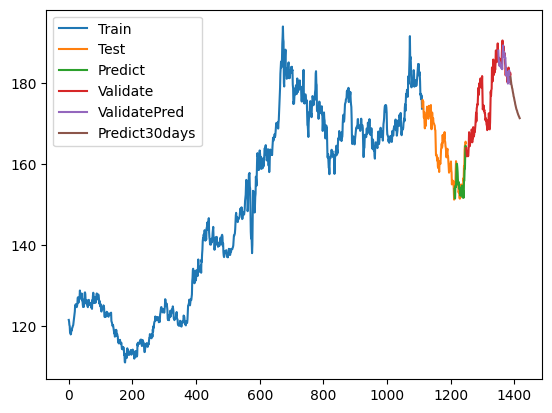

In [547]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()